## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

## Loading the dataset

In [2]:
df = pd.read_csv('datasets/drug200.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

The dataset has 200 records and 6 attributes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


The dataset has 1 float, 1 integer and 4 object columns.

### Attribute Description:-

<ol>
    <li>Age: stores the age of patient</li>
    <li>Sex: stores the gender of patients</li>
    <li>BP: contains blood pressure of patient</li>
    <li>Cholesterol: stores cholesterol of patient</li>
    <li>Na_to_K: contains Sodium to Potassium ratio in blood</li>
    <li>Drug: contains he drug type given to patients</li>
</ol>

In [6]:
# Check for missing values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

The dataset doesn't have any null values.

In [7]:
# Check for duplicates

duplicate = df[df.duplicated()]
duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


Hence, no duplicate records are present.

In [8]:
# Find minimum and maximum age

print("Minimum Age is {} years".format(df['Age'].min()))
print("Maximum Age is {} years".format(df['Age'].max()))

Minimum Age is 15 years
Maximum Age is 74 years


In [9]:
# Find unique values in categorical attributes

print("Sex:", df['Sex'].unique())
print("BP:", df['BP'].unique())
print("Cholesterol:", df['Cholesterol'].unique())
print("Drug:", df['Drug'].unique())

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


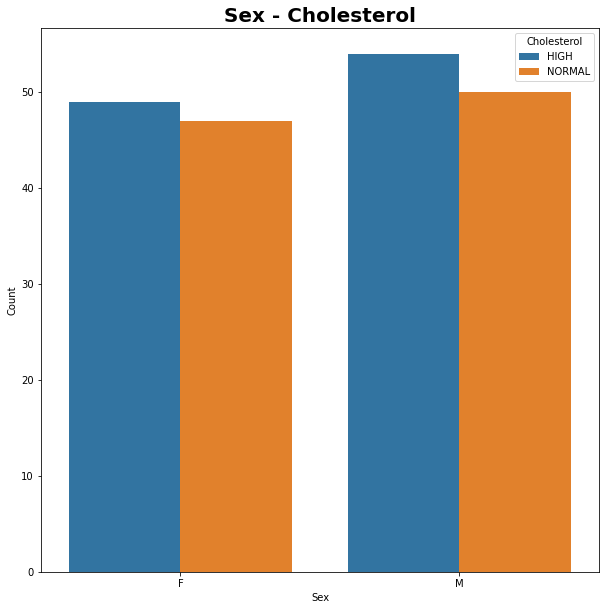

In [10]:
# Analyze Cholesterol based on Sex

df_Sex_Cholesterol = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,10))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Sex - Cholesterol", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b> It is observed that both Female and Male suffer from high cholesterol levels.

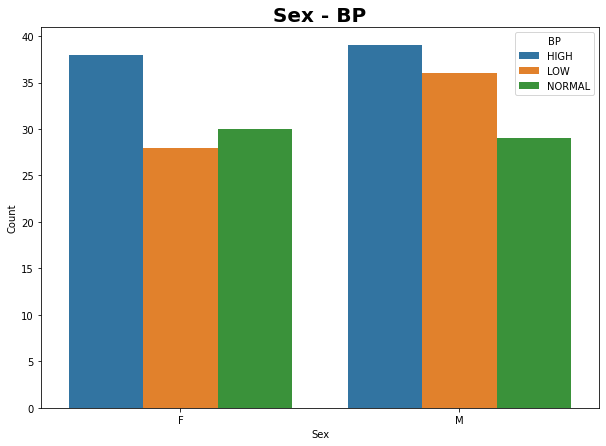

In [11]:
# Analyze BP based on Sex

df_Sex_BP = df.groupby(["Sex", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,7))
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df_Sex_BP)
plt.title("Sex - BP", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b>

<ul>
    <li>Both Female and Male suffer from high blood pressure levels.</li>
    <li>More males suffer from high blood pressure than females.</li>
    <li>Almost same number of male and female have normal blood pressure.</li>    
</ul>    

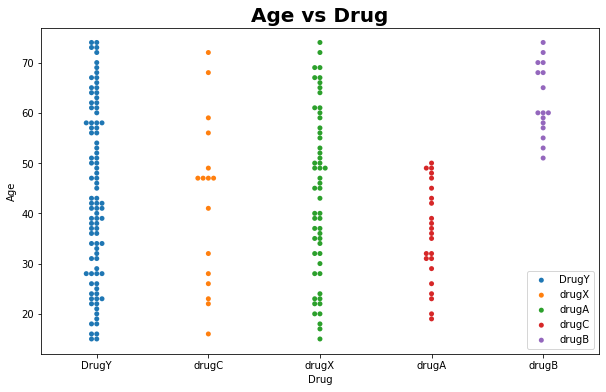

In [12]:
# Analyze Drug based on Age

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age vs Drug", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b>

<ul>
    <li>drugA is only given to patients whose age is between 20 to 50 years.</li>
    <li>drugB is only given to patients above 50 years.</li>
    <li>DrugY, drugC and drugX can be given to all age groups.</li>    
</ul>    

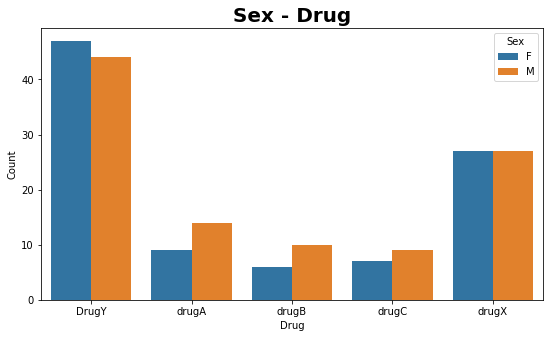

In [13]:
# Analyze Drug based on Sex

df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "Sex", data = df_Sex_Drug)
plt.title("Sex - Drug", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b>

<ul>
    <li>DrugY is given to more female patients.</li>
    <li>drugA, drugB and drugC is only given to more male patients.</li>
    <li>drugX ig given equally to male and female patients.</li>    
</ul>    

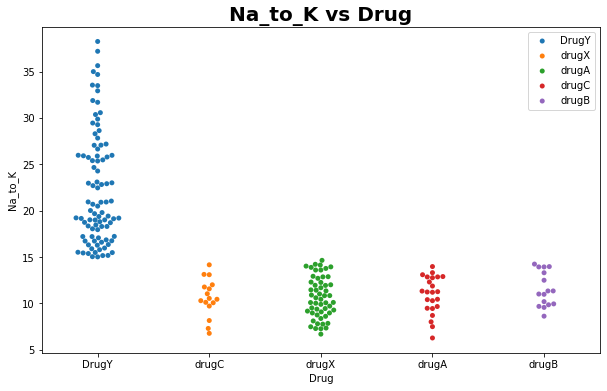

In [14]:
# Analyze Drug based on Na_to_K

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b>

<ul>
    <li>DrugY is only given to patients whose Na_to_K ratio is greater than 15.</li>
    <li>drugC, drugX, drugA and drugB are given to patients whose Na_to_K ratio is between 5 and 15.</li>    
</ul>    

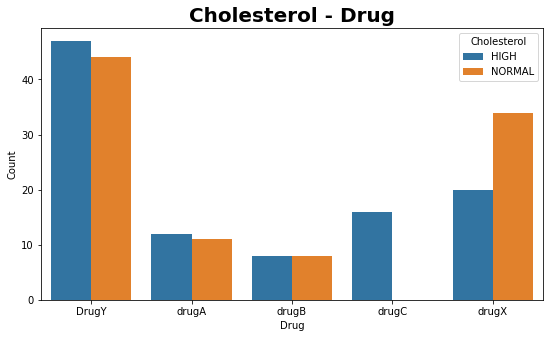

In [15]:
# Analyze Drug based on Cholesterol

df_Sex_Drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "Cholesterol", data = df_Sex_Drug)
plt.title("Cholesterol - Drug", fontsize=20, fontweight='bold')
plt.show()

<b>Observation:-</b>

<ul>
    <li>DrugY and drugA is given to more patients whose Cholesterol level is High.</li>
    <li>drugB can be given to patients whose Cholesterol level is High or Normal.</li> 
    <li>drugC is only given to those patients who have High Cholesterol level.</li>
    <li>drugX is given to more patients whose Cholesterol level is Normal.</li>
</ul>    

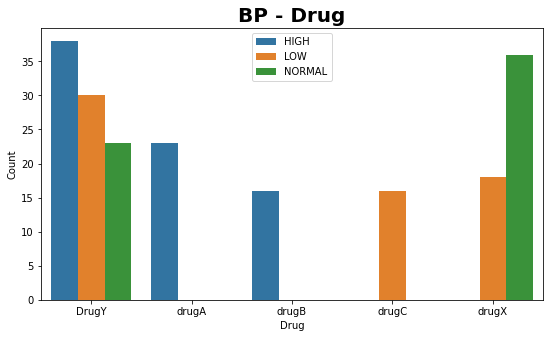

In [16]:
# Analyze Drug based on BP

df_Sex_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df_Sex_Drug)
plt.title("BP - Drug", fontsize=20, fontweight='bold')
plt.legend(loc='upper center')
plt.show()

<b>Observation:-</b>

<ul>
    <li>DrugY is given to more patients whose BP is High.</li>
    <li>drugA and drugB can be given to only those patients whose BP is High.</li> 
    <li>drugC is only given to those patients who have Low BP.</li>
    <li>drugX is given to more patients whose BP is Normal.</li>
</ul>    

Text(0.5, 0, 'Drug')

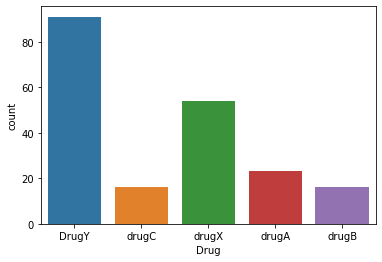

In [17]:
# Distribution of Drug

sns.countplot(x='Drug', data=df)
plt.xlabel('Drug')

<b>Observation:-</b>

<ul>
    <li>DrugY is given to most patients followed by drugX.</li>
    <li>drugA, drugB and drugC are given to less number of patients.</li> 
</ul>    

In [18]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

lables = ['Sex', 'BP', 'Cholesterol', 'Drug']
for i in lables:
    label_encoder(i)

In [19]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


Hence, all the categorical attributes are encoded.

## Model

### Splitting the data into training and testing set

In [20]:
X = df.iloc[:, :-1]        # independent variable
y = df.iloc[:, -1]         # dependent variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 5) (40, 5) (160,) (40,)


### 1. Random Forest Classifier

In [22]:
# without tuning hyperparameters

clf1 = RandomForestClassifier(random_state=42)
accuracies = cross_val_score(clf1, X_train, y_train, cv=5)
clf1.fit(X_train, y_train)

print("Train Score:", np.mean(accuracies))
print("Test Score:", clf1.score(X_test, y_test))

Train Score: 0.9875
Test Score: 1.0


In [23]:
# Predicting values

y_pred1 = clf1.predict(X_test)
y_pred1

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [24]:
# F1 score

clf1_f1_score = f1_score(y_test, y_pred1, average='weighted')
clf1_f1_score

1.0

In [25]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [26]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [27]:
# using GridSearchCV

grid = {'n_estimators': np.arange(1, 100), 'criterion':['gini','entropy']}

clf2 = RandomForestClassifier(random_state=42)
clf2_cv = GridSearchCV(clf2, grid, cv=5)
clf2_cv.fit(X_train, y_train)

print("Hyperparameters Used:", clf2_cv.best_params_)
print("Train Score:", np.mean(accuracies))
print("Test Score:", clf2_cv.score(X_test, y_test))

Hyperparameters Used: {'criterion': 'gini', 'n_estimators': 33}
Train Score: 0.9875
Test Score: 1.0


In [28]:
y_pred2 = clf2_cv.predict(X_test)
y_pred2

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [29]:
# F1 score

clf2_f1_score = f1_score(y_test, y_pred2, average='weighted')
clf2_f1_score

1.0

In [30]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [31]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

### 2. Decision Tree Classifier

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [34]:
# F1 score

dt_f1_score = f1_score(y_test, y_pred_dt, average='weighted')
dt_f1_score

1.0

In [35]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

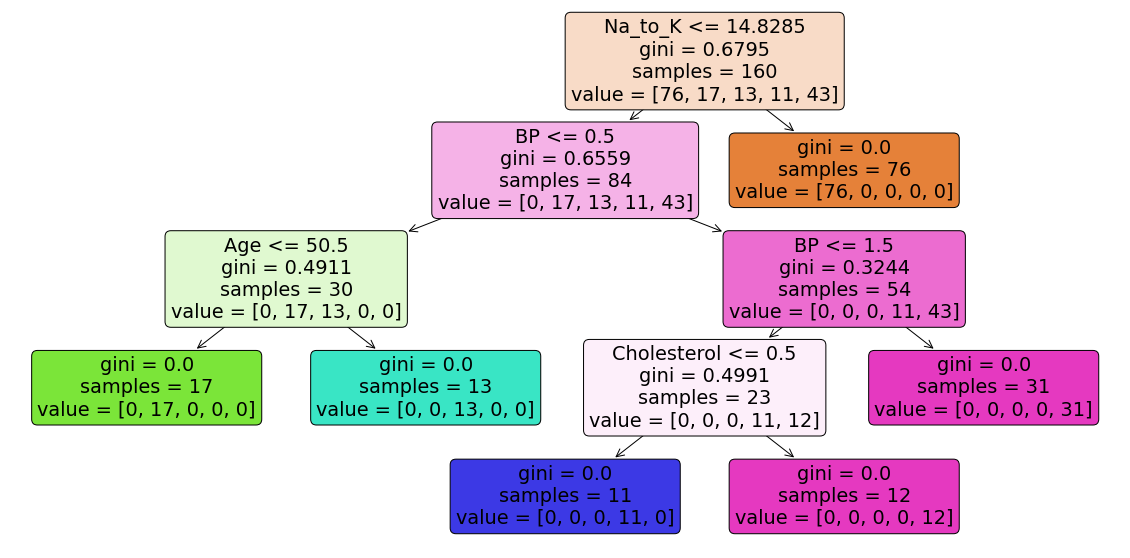

In [37]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,10))
dec_tree = plot_tree(decision_tree=dt, feature_names = df.columns, filled = True , precision = 4, rounded = True)

### 3. KNN Classifier

In [38]:
grid = {'n_neighbors': np.arange(1,100)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid)
knn_cv.fit(X_train, y_train)

print("Hyperparameters Used:", knn_cv.best_params_)
print("Train Score:", np.mean(accuracies))
print("Test Score:", knn_cv.score(X_test, y_test))

Hyperparameters Used: {'n_neighbors': 7}
Train Score: 0.9875
Test Score: 0.65


In [39]:
y_pred_knn = knn_cv.predict(X_test)
y_pred_knn

array([4, 4, 4, 2, 0, 0, 0, 1, 0, 4, 1, 4, 0, 4, 2, 0, 4, 2, 1, 0, 4, 2,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 4, 4, 0, 1, 0, 2, 1, 0, 4])

In [40]:
# F1 score

knn_f1_score = f1_score(y_test, y_pred_knn, average='weighted')
knn_f1_score

0.6462348484848486

In [41]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.60      0.50      0.55         6
           2       0.20      0.33      0.25         3
           3       1.00      0.20      0.33         5
           4       0.50      0.64      0.56        11

    accuracy                           0.65        40
   macro avg       0.65      0.52      0.52        40
weighted avg       0.72      0.65      0.65        40



Text(0.5, 1.0, 'Accuracy Score: 0.65')

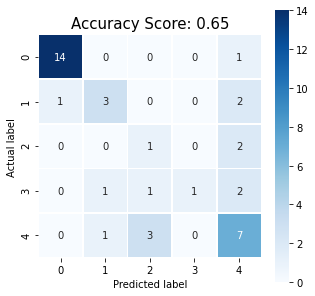

In [42]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(knn_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

<b>Observation:-</b>

<ul>
    <li>It can be observed that maximum errors have occured in predicting class label 4.</li>
    <li>Label 3 is also wrongly predicted as class 1 and 2.</li>
</ul>

## Conclusion

Random Forest Classifier predicted all classes correctly and gave 100% accuracy with and without tuning hyperparameters. Decision Tree Classifier also gave 100% accuracy score. K Nearest Neighbors Classifier only gave an accuracy of 64.62% with hyperparameter tuning.